In [1]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy import interpolate
import scipy.stats as stats

In [2]:
#在材料沒有損耗的情況下觀察變化
with open('S11 參數 Df = 0.csv', 'r') as file1:
    ls1 = list(csv.reader(file1))
    sset = dict()
    freq = []
    key = []
    for i in range(1, len(ls1[0])):
        k = float(ls1[0][i].split("Dk='")[1][:-1])
        val = []
        for j in range(1,len(ls1)):
            
            if i == 1:
                freq.append(float(ls1[j][0]))
            
            val.append(float(ls1[j][i]))
        sset[k] = val
        key.append(k)

In [3]:
freq

[26.0,
 26.0201005025126,
 26.0402010050251,
 26.0603015075377,
 26.0804020100503,
 26.1005025125628,
 26.1206030150754,
 26.1407035175879,
 26.1608040201005,
 26.1809045226131,
 26.2010050251256,
 26.2211055276382,
 26.2412060301508,
 26.2613065326633,
 26.2814070351759,
 26.3015075376884,
 26.321608040201,
 26.3417085427136,
 26.3618090452261,
 26.3819095477387,
 26.4020100502513,
 26.4221105527638,
 26.4422110552764,
 26.4623115577889,
 26.4824120603015,
 26.5025125628141,
 26.5226130653266,
 26.5427135678392,
 26.5628140703518,
 26.5829145728643,
 26.6030150753769,
 26.6231155778894,
 26.643216080402,
 26.6633165829146,
 26.6834170854271,
 26.7035175879397,
 26.7236180904523,
 26.7437185929648,
 26.7638190954774,
 26.78391959799,
 26.8040201005025,
 26.8241206030151,
 26.8442211055276,
 26.8643216080402,
 26.8844221105528,
 26.9045226130653,
 26.9246231155779,
 26.9447236180905,
 26.964824120603,
 26.9849246231156,
 27.0050251256281,
 27.0251256281407,
 27.0452261306533,
 27.065326

In [11]:
#找到發生最低點的位置，以及-10dB的寬度 
def Sfeature(slist, f):
    
    def intersectx(x1, y1, x2, y2, targety):
        return x1 + (x2 - x1)/ (y2 - y1) * (targety -y1)
    
    pos = f[slist.index(min(slist))]
    boundary = []
    
    for i in range(len(slist)-1):
        if (slist[i] > -10 and slist[i+1] <= -10) or (slist[i] <= -10 and slist[i+1] > -10):
            F = intersectx(f[i], slist[i], f[i+1], slist[i+1], -10)
            boundary.append(F)
    #print(len(boundary))
    #print(boundary)
    out = [pos, boundary[1] - boundary[0]]        
    return out

In [12]:
POS = []
BW = []
Dk = []
for i in range(500):
    Dk.append(float(1.00+i*0.01))
    x = Sfeature(sset[key[i]], freq)
    POS.append(x[0])
    BW.append(x[1])

In [32]:
print(BW[51])
print(BW[151])
print(BW[251])
print(BW[351])
print(BW[451])

0.8017352781852232
0.7817497303720522
0.725404170332073
0.6571500818391591
0.6047507392319886


In [37]:
print(POS[51])
print(POS[151])
print(POS[251])
print(POS[351])
print(POS[451])

28.1708542713568
28.1909547738693
28.2713567839196
28.3115577889447
28.2914572864322


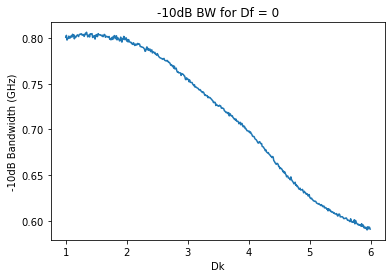

In [13]:
plt.plot(Dk, BW)
plt.xlabel('Dk')
plt.ylabel('-10dB Bandwidth (GHz)')
plt.title('-10dB BW for Df = 0')
plt.show()

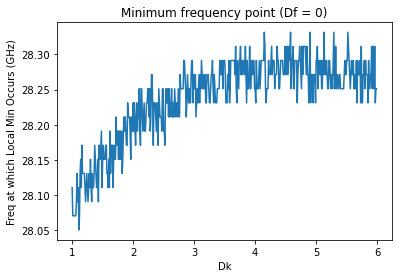

In [15]:
plt.plot(Dk, POS)
plt.xlabel("Dk")
plt.ylabel('Freq at which Local Min Occurs (GHz)')
plt.title('Minimum frequency point (Df = 0)')
plt.show()

In [30]:
#固定同一個Dk，觀察隨著待測物影響造成的Df變化
with open('S11 0818.csv', 'r') as file2:
    ls2 = list(csv.reader(file2))
    collection = []
    Df = []
    for i in range(25): 
        Df.append(0.02*(i+1))
        eachDf = []
        for j in range(5):
            eachls = []
            for k in range(1, len(ls2)):
                eachls.append(float(ls2[k][1+5*i+j]))
                
            eachDf.append(eachls)
        collection.append(eachDf)

In [31]:
Df

[0.02,
 0.04,
 0.06,
 0.08,
 0.1,
 0.12,
 0.14,
 0.16,
 0.18,
 0.2,
 0.22,
 0.24,
 0.26,
 0.28,
 0.3,
 0.32,
 0.34,
 0.36,
 0.38,
 0.4,
 0.42,
 0.44,
 0.46,
 0.48,
 0.5]

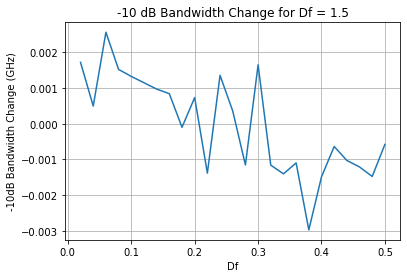

In [36]:
#在Dk = 1.50時隨著Df的變化
deltaBW = []
for i in range(len(collection)):
    data = Sfeature(collection[i][0], freq)
    deltaBW.append(data[1] - 0.8017352781852232)
plt.xlabel('Df')
plt.ylabel('-10dB Bandwidth Change (GHz)')
plt.title('-10 dB Bandwidth Change for Df = 1.5')
plt.plot(Df, deltaBW)
plt.grid(True)
plt.show()

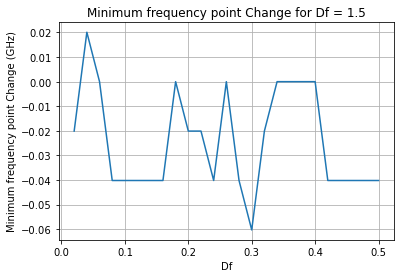

In [38]:
#在Dk = 1.50時隨著Df的變化
deltaF = []
for i in range(len(collection)):
    data = Sfeature(collection[i][0], freq)
    deltaF.append(data[0] - 28.1708542713568)
plt.xlabel('Df')
plt.ylabel('Minimum frequency point Change (GHz)')
plt.title('Minimum frequency point Change for Df = 1.5')
plt.plot(Df, deltaF)
plt.grid(True)
plt.show()